In [1]:
import pandas as pd

data = pd.read_csv("SwachhBharat.csv")


years = ["2019-2020", "2020-21", "2021-22", "2022-23 (till January 31-03-2023)"]

for year in years:
    funds_released_col = f"{year} - Funds Released"
    funds_utilized_col = f"{year} - Funds Utilized"
    utilization_rate_col = f"Utilization Rate {year}"
    
    data[utilization_rate_col] = data[funds_utilized_col] / data[funds_released_col]

utilization_rate_columns = [f"Utilization Rate {year}" for year in years]
print("\nUtilization Rates:")
print(data[['State/ UT'] + utilization_rate_columns])


overall_funds_released = data[[f"{year} - Funds Released" for year in years]].sum().sum()
overall_funds_utilized = data[[f"{year} - Funds Utilized" for year in years]].sum().sum()
overall_utilization_rate = overall_funds_utilized / overall_funds_released
print("\nOverall Utilization Rate:", overall_utilization_rate)



Utilization Rates:
                      State/ UT  Utilization Rate 2019-2020  \
0   Andaman and Nicobar Islands                    1.000000   
1                Andhra Pradesh                    0.859130   
2             Arunachal Pradesh                         NaN   
3                         Assam                    0.403106   
4                         Bihar                    0.000000   
5                    Chandigarh                    1.000000   
6                  Chhattisgarh                         NaN   
7        Dadra and Nagar Haveli                         NaN   
8                 Daman and Diu                    0.000000   
9                         Delhi                    0.845659   
10                          Goa                    0.370031   
11                      Gujarat                         NaN   
12                      Haryana                    0.000000   
13             Himachal Pradesh                    0.926606   
14            Jammu and Kashmir    

In [2]:

data["Difference Before 2020"] = data["2019-2020 - Funds Released"] - data["Allocation under SBM-U"]
data["Difference After 2020"] = (
    data["2020-21 - Funds Released"] + 
    data["2021-22 - Funds Released"] + 
    data["2022-23 (till January 31-03-2023) - Funds Released"]
) - data["2019-2020 - Funds Released"]


print("\nDifferences in Spending:")
print(data[['State/ UT', 'Difference Before 2020', 'Difference After 2020']])



Differences in Spending:
                      State/ UT  Difference Before 2020  Difference After 2020
0   Andaman and Nicobar Islands                   -2.57                 -0.890
1                Andhra Pradesh                 -513.83                241.180
2             Arunachal Pradesh                  -36.28                 15.760
3                         Assam                 -160.60                 -0.860
4                         Bihar                 -516.81                -31.290
5                    Chandigarh                   -9.23                  4.350
6                  Chhattisgarh                 -357.85                 10.140
7        Dadra and Nagar Haveli                   -4.13                  0.180
8                 Daman and Diu                   -2.53                    NaN
9                         Delhi                 -346.64                227.256
10                          Goa                  -13.82                  4.812
11                      Gu

In [3]:
data["Increase After 2020"] = data["Difference After 2020"] > 0
data["Increase Amount After 2020"] = data["Difference After 2020"].where(data["Increase After 2020"], 0)

increased_spending_states = data[data["Increase After 2020"]][["State/ UT", "Increase Amount After 2020"]]
print("\nStates/UTs with Increased Spending after 2020 and Corresponding Increase Amount:")
print(increased_spending_states)



States/UTs with Increased Spending after 2020 and Corresponding Increase Amount:
                 State/ UT  Increase Amount After 2020
1           Andhra Pradesh                     241.180
2        Arunachal Pradesh                      15.760
5               Chandigarh                       4.350
6             Chhattisgarh                      10.140
7   Dadra and Nagar Haveli                       0.180
9                    Delhi                     227.256
10                     Goa                       4.812
11                 Gujarat                      95.460
13        Himachal Pradesh                       8.400
14       Jammu and Kashmir                       4.750
15               Jharkhand                       3.000
16               Karnataka                     216.230
17                  Kerala                       4.680
19          Madhya Pradesh                     130.870
20             Maharashtra                     113.600
21                 Manipur            

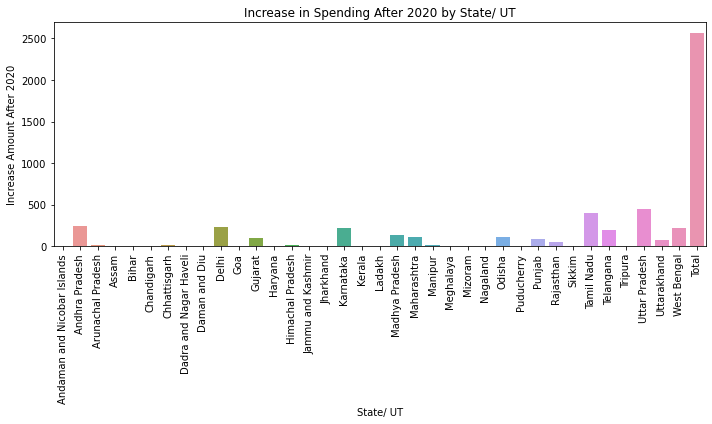

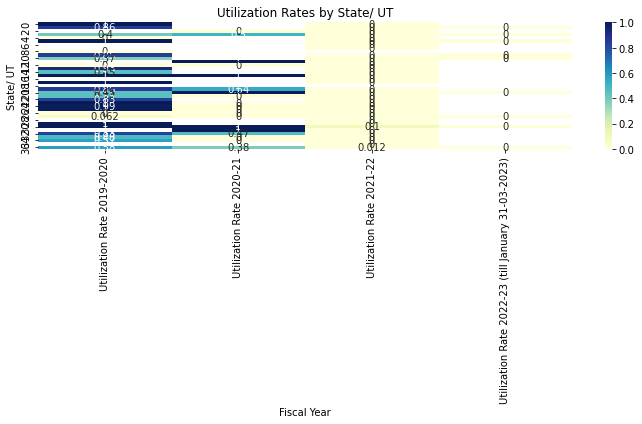

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="State/ UT", y="Increase Amount After 2020")
plt.xticks(rotation=90)
plt.xlabel("State/ UT")
plt.ylabel("Increase Amount After 2020")
plt.title("Increase in Spending After 2020 by State/ UT")
plt.tight_layout()
plt.show()

utilization_rate_data = data[["Utilization Rate 2019-2020", "Utilization Rate 2020-21", "Utilization Rate 2021-22", "Utilization Rate 2022-23 (till January 31-03-2023)"]]
plt.figure(figsize=(10, 6))
sns.heatmap(utilization_rate_data, annot=True, cmap="YlGnBu")
plt.xlabel("Fiscal Year")
plt.ylabel("State/ UT")
plt.title("Utilization Rates by State/ UT")
plt.tight_layout()
plt.show()


In [5]:
data["Utilization Rate Difference Before 2020"] = data["Utilization Rate 2019-2020"] - data["Allocation under SBM-U"]
data["Utilization Rate Difference After 2020"] = (
    data["Utilization Rate 2020-21"] + 
    data["Utilization Rate 2021-22"] + 
    data["Utilization Rate 2022-23 (till January 31-03-2023)"]
) - data["Utilization Rate 2019-2020"]

print("\nUtilization Rate Differences:")
print(data[['State/ UT', 'Utilization Rate Difference Before 2020', 'Utilization Rate Difference After 2020']])



Utilization Rate Differences:
                      State/ UT  Utilization Rate Difference Before 2020  \
0   Andaman and Nicobar Islands                                -2.520000   
1                Andhra Pradesh                              -570.470870   
2             Arunachal Pradesh                                      NaN   
3                         Assam                              -243.896894   
4                         Bihar                              -556.680000   
5                    Chandigarh                               -27.020000   
6                  Chhattisgarh                                      NaN   
7        Dadra and Nagar Haveli                                      NaN   
8                 Daman and Diu                                -2.580000   
9                         Delhi                              -348.904341   
10                          Goa                               -16.719969   
11                      Gujarat                          

In [6]:
import numpy as np
import statsmodels.api as sm

print("Missing or Infinite Values Check:")
print(data.isnull().sum())
print(data.isin([np.inf, -np.inf]).sum())


X_before = sm.add_constant(data["Allocation under SBM-U"])
y_before = data["Utilization Rate Difference Before 2020"]

X_before = X_before[~y_before.isna()]
y_before = y_before.dropna()

model_before = sm.OLS(y_before, X_before).fit()


X_after = sm.add_constant(data[["Utilization Rate 2020-21", "Utilization Rate 2021-22", "Utilization Rate 2022-23 (till January 31-03-2023)"]])
y_after = data["Utilization Rate Difference After 2020"]


X_after = X_after[~y_after.isna()]
y_after = y_after.dropna()

model_after = sm.OLS(y_after, X_after).fit()


print("\nRegression Analysis for Utilization Rate Differences Before 2020:")
print(model_before.summary())

print("\nRegression Analysis for Utilization Rate Differences After 2020:")
print(model_after.summary())


Missing or Infinite Values Check:
Sl. No.                                                  0
State/ UT                                                0
Allocation under SBM-U                                   0
Allocation under SBM-U 2.0                               1
2019-2020 - Funds Released                               0
2019-2020 - Funds Utilized                               1
2019-2020 - Funds Unutilized                             1
2020-21 - Funds Released                                 2
2020-21 - Funds Utilized                                 2
2020-21 - Funds Unutilized                               2
2021-22 - Funds Released                                 2
2021-22 - Funds Utilized                                 1
2021-22 - Funds Unutilized                               2
2022-23 (till January 31-03-2023) - Funds Released       2
2022-23 (till January 31-03-2023) - Funds Utilized       1
2022-23 (till January 31-03-2023) - Funds Unutilized     1
Utilization Rate 2019-

C:\Users\Syed Fahad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Syed Fahad\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


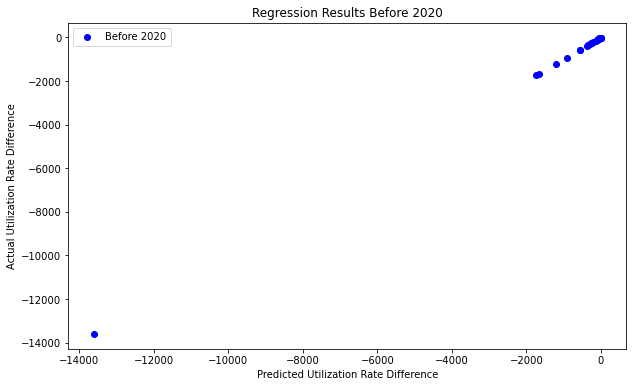

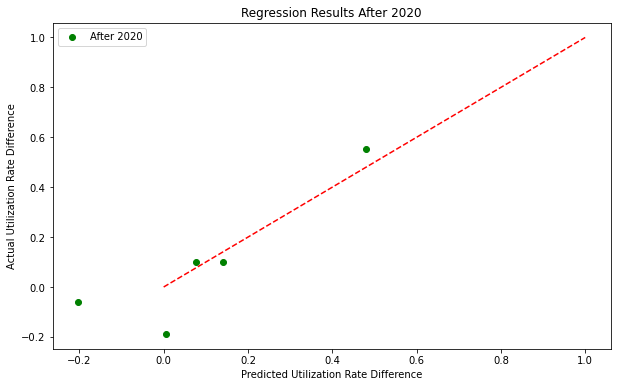

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(model_before.fittedvalues, y_before, color='blue', label='Before 2020')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Predicted Utilization Rate Difference')
plt.ylabel('Actual Utilization Rate Difference')
plt.title('Regression Results Before 2020')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(model_after.fittedvalues, y_after, color='green', label='After 2020')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Predicted Utilization Rate Difference')
plt.ylabel('Actual Utilization Rate Difference')
plt.title('Regression Results After 2020')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error

rmse_before = np.sqrt(mean_squared_error(y_before, model_before.predict(X_before)))
rmse_after = np.sqrt(mean_squared_error(y_after, model_after.predict(X_after)))


print("\nRMSE for Utilization Rate Differences Before 2020:", rmse_before)
print("RMSE for Utilization Rate Differences After 2020:", rmse_after)


RMSE for Utilization Rate Differences Before 2020: 0.36322369499629314
RMSE for Utilization Rate Differences After 2020: 0.1142077264284617
